# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [64]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Viz
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")

# Modelling libraries
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression #sci-kit for learning, science-kit, sklearn

In [65]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

<Axes: xlabel='Age', ylabel='Tardies'>

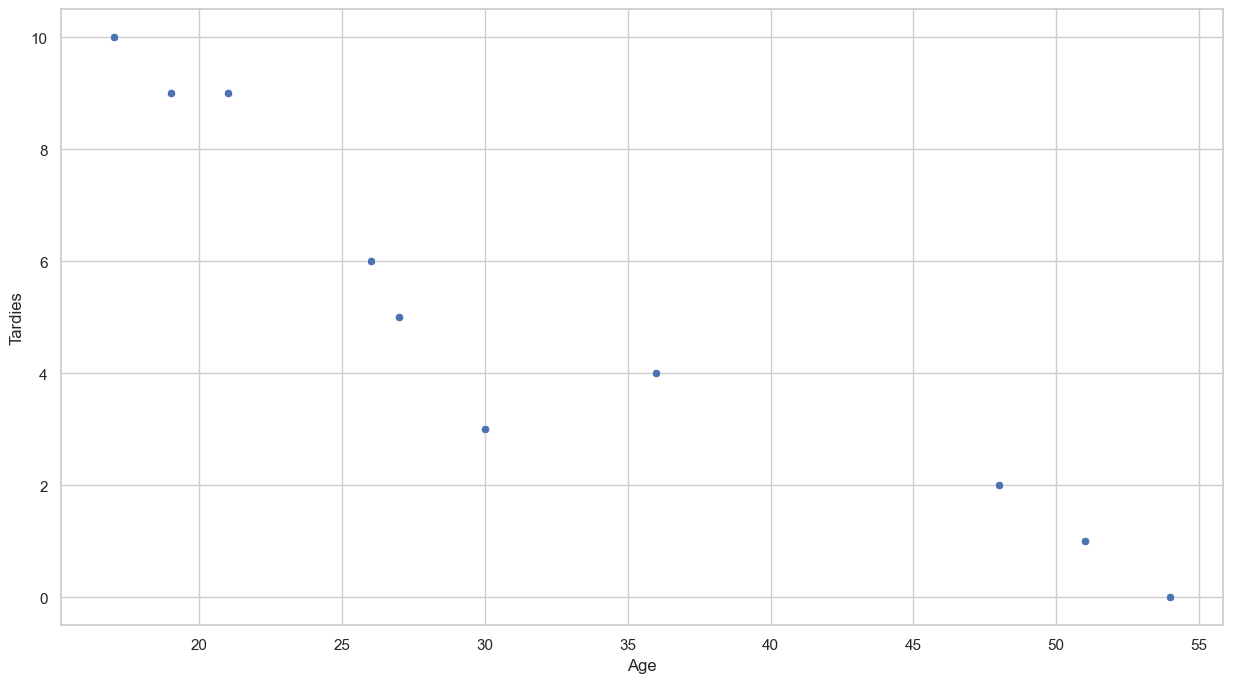

In [66]:
sns.scatterplot(data=student_data, x='Age', y='Tardies')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

We can see that as the people get older they get late less (they have less time to live, so they don't waste it)

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [67]:
print("The correlation is:")
print(student_data.corr())

print("The covariance is:")
print(student_data.cov())

The correlation is:
              Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000
The covariance is:
                Age    Tardies
Age      187.655556 -45.566667
Tardies  -45.566667  12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

Plot your regression model on your scatter plot.

In [114]:
#1. X, y: 
X = student_data[["Age"]]
y = student_data.Tardies

#2. Choose a model: lr
lr = LinearRegression()

#3. Fit
lr.fit(X, y) 

#4. Metrics
lr.intercept_
lr.coef_ 

student_data["Prediction"] = student_data.Age * lr.coef_[0] + lr.intercept_

In [105]:
student_data.sample(10)

,Age,Tardies,Prediction
3,21,9,10.703416
2,27,5,11.674700
7,26,6,11.431879
9,30,3,12.160341
8,54,0,12.888803
4,36,4,11.917520
1,51,1,12.645983
6,19,9,10.703416
0,17,10,10.460596
5,48,2,12.403162


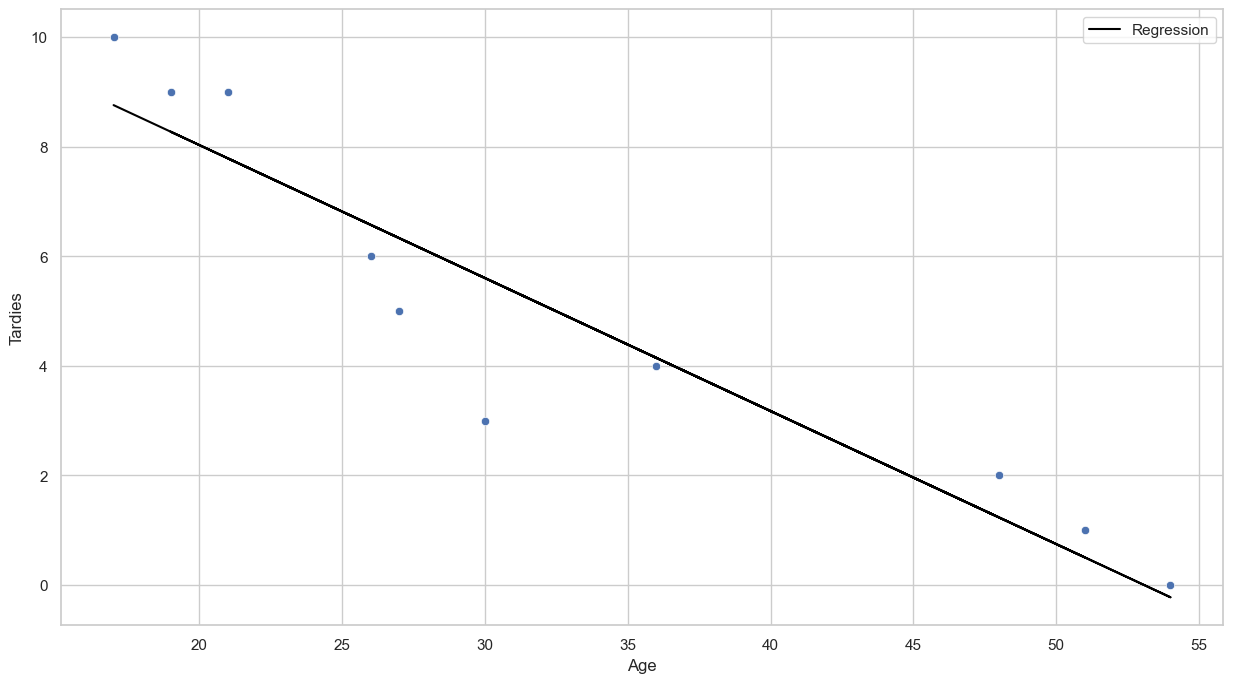

In [115]:
sns.scatterplot(x=student_data.Age, y=student_data.Tardies)
plt.plot(student_data.Age, student_data["Prediction"], c="black", label="Regression")
plt.legend()

In [ ]:
sns

-- My outcome variable (Y) is Tardines because this is the one afected for my Age.

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [95]:
model_results.summary()

c:\Users\enamo\miniconda3\envs\ironhack\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           5.57e-05
Time:                        15:04:32   Log-Likelihood:                -29.149
No. Observations:                  10   AIC:                             62.30
Df Residuals:                       8   BIC:                             62.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.6988      2.791     18.168      0.000      44.264      57.134
Tardies       -3.6324      0.470     -7.734      0.000      -4.716      -2.549
==============================================================================
Omnibus:                        3.472   Durbin-Watson:                   2.182
Prob(Omnibus):                  0.176   Jarque-Bera (JB):                1.714
Skew:                          -1.010   Prob(JB):                        0.424
Kurtosis:                       2.812   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

-- Our R2 is over 88% so we are confident with our Model and the p_value is 0 so we reject our N0 and we can say that Age explains Tardines. 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [112]:
df = pd.read_csv('vehicles.csv')

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [129]:
df.loc[:,['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']].corrwith(df["CO2 Emission Grams/Mile"])
# The most relevant variable is Fuel Barrels/Year (The one with bigger correlation) and the one less determining is Combined MPG.

Year                -0.222300
Cylinders            0.752393
Fuel Barrels/Year    0.986189
Combined MPG        -0.926229
Fuel Cost/Year       0.930865
dtype: float64

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [136]:
# 1. X, y: 
X = df[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = df["CO2 Emission Grams/Mile"]

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [141]:
results = smf.ols("y ~ X", data = df).fit()
results.summary()

# First the model is super reliable because our R2 and R2 adjusted are near 100%.
# Second the most important value that helps explain us the evolucion of the CO2 is Fuel Barrels/Year. 
# In a less scale, Cylinders and Combined MPG rhey also help the explain the evolution of this value.      

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 3.687e+05
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:00:20   Log-Likelihood:            -1.5173e+05
No. Observations:               35952   AIC:                         3.035e+05
Df Residuals:                   35946   BIC:                         3.035e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    769.8883     19.392     39.702      0.000     731.880     807.897
X[0]          -0.3206      0.010    -33.060      0.000      -0.340      -0.302
X[1]           1.8788      0.083     22.598      0.000       1.716       2.042
X[2]          19.0529      0.061    311.600      0.000      18.933      19.173
X[3]          -3.0404      0.042    -71.645      0.000      -3.124      -2.957
X[4]           0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [153]:
df = pd.read_clipboard()
df = df.drop(columns=["|", "|.1", "|.2"])
df = df.dropna()

In [171]:
new_column_names = {
    'X': 'invited',
    'Y': 'attended'
}
df = df.rename(columns=new_column_names)

In [172]:
#1. X, y: 
X = df[["invited"]]
y = df.attended

#2. Choose a model: lr
lr = LinearRegression()

#3. Fit
lr.fit(X, y) 

#4. Metrics
lr.intercept_
lr.coef_ 

df["Prediction"] = df.invited * lr.coef_[0] + lr.intercept_

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

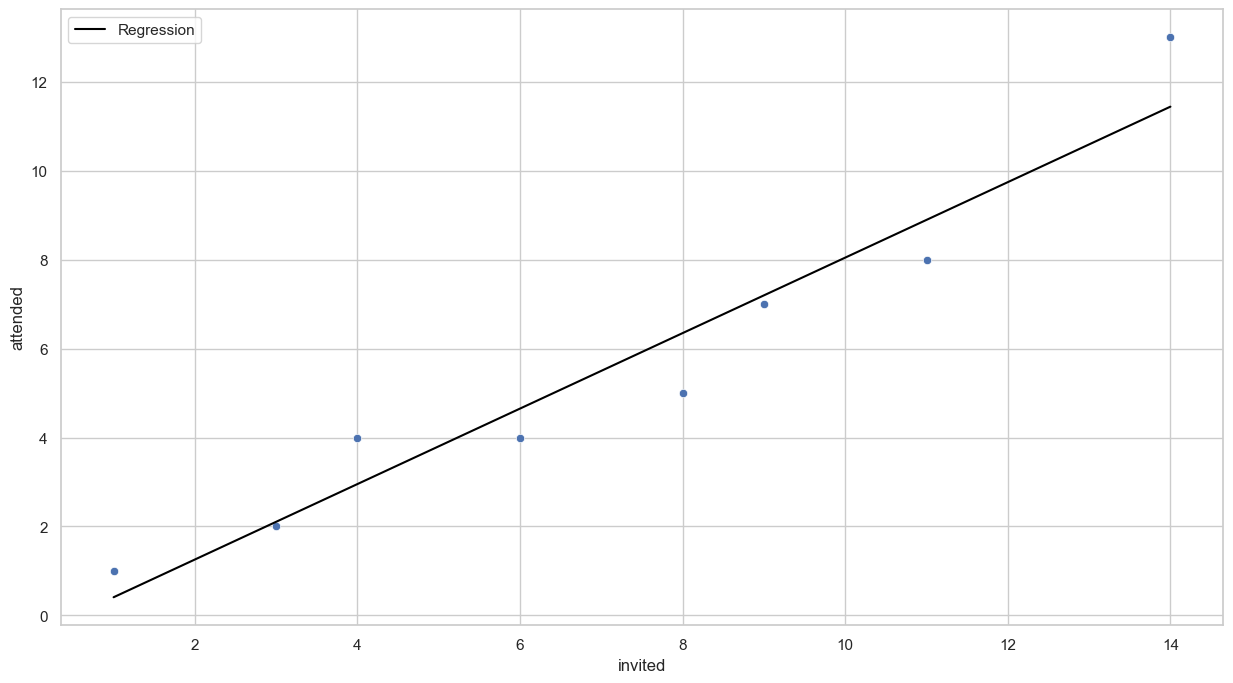

In [174]:
sns.scatterplot(x=df.invited, y=df.attended)
plt.plot(df.invited, df["Prediction"], c="black", label="Regression")
plt.legend();

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [78]:
# There is a possitive relatitionship between the 2 variables, so as the invited augment, also the number of atendees.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

<Axes: >

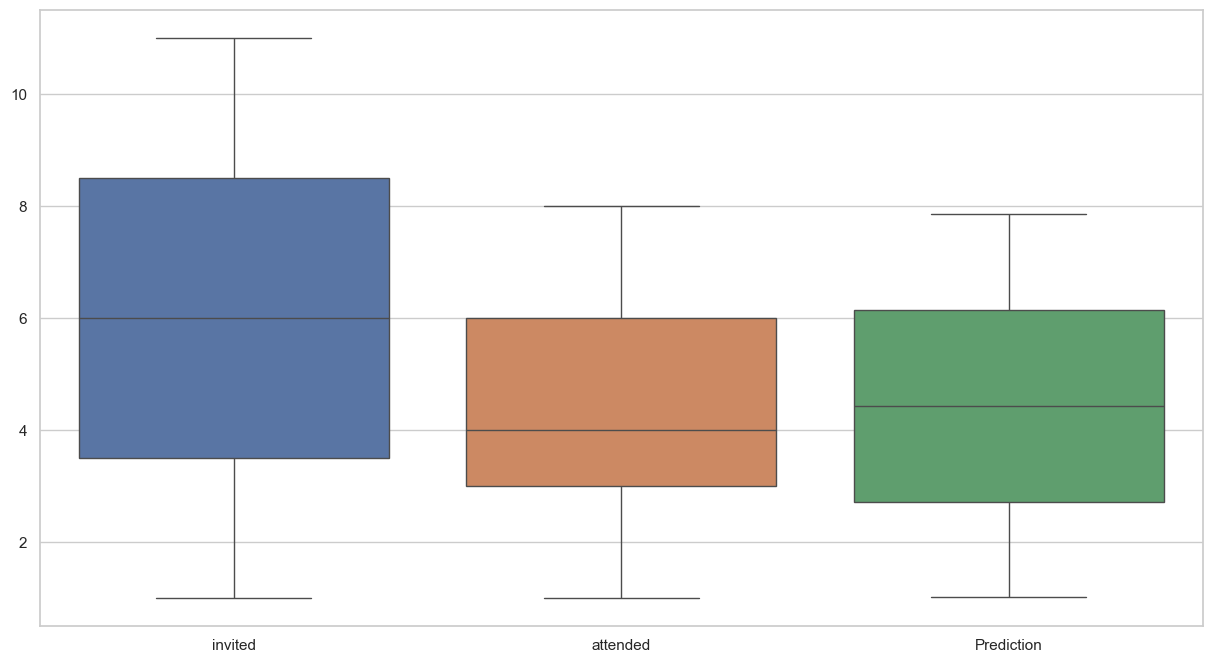

In [190]:
sns.boxplot(df)

In [191]:
df.loc[df.attended==df.attended.max()].index

Index([7], dtype='int64')

In [ ]:
# We see that our outlier is on the index 8
df = df.drop(8)

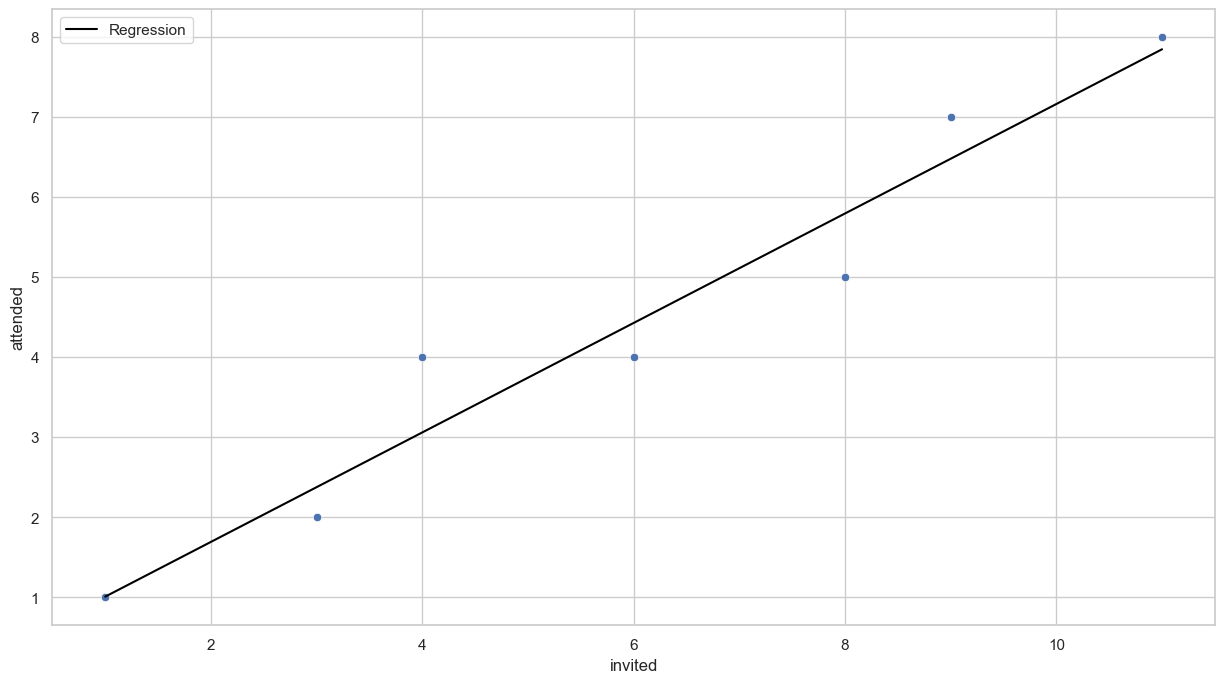

In [189]:
#1. X, y: 
X = df[["invited"]]
y = df.attended

#2. Choose a model: lr
lr = LinearRegression()

#3. Fit
lr.fit(X, y) 

#4. Metrics
lr.intercept_
lr.coef_ 

df["Prediction"] = df.invited * lr.coef_[0] + lr.intercept_

sns.scatterplot(x=df.invited, y=df.attended)
plt.plot(df.invited, df["Prediction"], c="black", label="Regression")
plt.legend();

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [192]:
results = smf.ols("y ~ X", data = df).fit()
results.summary()

# The sample was almost fully homogeneous so now is almost perfect you can ss

c:\Users\enamo\miniconda3\envs\ironhack\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.31
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           0.000264
Time:                        17:22:22   Log-Likelihood:                -5.7771
No. Observations:                   7   AIC:                             15.55
Df Residuals:                       5   BIC:                             15.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3233      0.513      0.630      0.556      -0.996       1.642
X              0.6842      0.075      9.127      0.000       0.492       0.877
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.689
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.379
Skew:                           0.284   Prob(JB):                        0.827
Kurtosis:                       2.012   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""